In [ ]:
!pip install librosa

In [ ]:
from google.colab import drive
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from scipy.stats import hmean
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_all_audios(directory):
  audio_data = {}
  for filename in os.listdir(directory):
      filepath = os.path.join(directory, filename)
      try:
        y, sr = librosa.load(filepath)
        audio_data[filename] = y
      except Exception as e:
        print(f"Error loading {filename}: {e}")
  return audio_data

In [ ]:
blues_files = load_all_audios("/content/drive/MyDrive/Colab Notebooks/Procesamiento y Clasificación de Datos/PIA_Data/Blues")

In [ ]:
classical_files = load_all_audios("/content/drive/MyDrive/Colab Notebooks/Procesamiento y Clasificación de Datos/PIA_Data/Classical")

In [ ]:
country_files = load_all_audios("/content/drive/MyDrive/Colab Notebooks/Procesamiento y Clasificación de Datos/PIA_Data/Country")

In [ ]:
metal_files = load_all_audios("/content/drive/MyDrive/Colab Notebooks/Procesamiento y Clasificación de Datos/PIA_Data/Metal")

In [ ]:
pop_files = load_all_audios("/content/drive/MyDrive/Colab Notebooks/Procesamiento y Clasificación de Datos/PIA_Data/Pop")

In [ ]:
all_files = load_all_audios("/content/drive/MyDrive/Colab Notebooks/Procesamiento y Clasificación de Datos/PIA_Data/All")

In [ ]:
sample_files = load_all_audios("/content/drive/MyDrive/Colab Notebooks/Procesamiento y Clasificación de Datos/PIA_Data/Sample")

In [ ]:
audio_names = list(all_files.keys())
df = pd.DataFrame({'audio_name': audio_names})

In [ ]:
def get_genre(audio_name):
  if 'blues' in audio_name.lower():
    return 'Blues'
  elif 'classical' in audio_name.lower():
    return 'Classical'
  elif 'country' in audio_name.lower():
    return 'Country'
  elif 'metal' in audio_name.lower():
    return 'Metal'
  elif 'pop' in audio_name.lower():
    return 'Pop'
  else:
    return 'Unknown'

In [ ]:
df['genre'] = df['audio_name'].apply(get_genre)

In [ ]:
df.head()

,audio_name,genre,zcr_mean,zcr_variance,perceptual_mean,perceptual_variance,tempo,spectral_centroid_mean,spectral_centroid_variance,spectral_rolloff_mean,spectral_rolloff_variance,chroma_stft_mean,chroma_stft_variance
0,Copia de blues.00001.wav,Blues,0.056040,0.001448,-0.057255,3606.439209,[67.99958881578948],1530.261767,375915.508778,3550.713616,2.978311e+06,0.340849,0.094976
1,Copia de blues.00002.wav,Blues,0.076291,0.001007,1.032618,1855.716187,[161.4990234375],1552.832481,156471.010904,3042.410115,7.841309e+05,0.363538,0.085257
2,Copia de blues.00003.wav,Blues,0.033309,0.000423,0.068926,3564.204590,[63.02400914634146],1070.153418,184366.009438,2184.879029,1.493078e+06,0.404854,0.093999
3,Copia de blues.00007.wav,Blues,0.061442,0.001849,-5.965395,3253.132568,[92.28515625],1451.859414,449601.640728,2955.319717,1.629557e+06,0.307372,0.092853
4,Copia de blues.00004.wav,Blues,0.101461,0.001954,-8.460348,2631.799805,[135.99917763157896],1835.128513,343249.495746,3579.957471,1.572336e+06,0.308526,0.087843


In [ ]:
def zcr_mean(audio_data):
    zcr = librosa.feature.zero_crossing_rate(audio_data)
    return np.mean(zcr)

In [ ]:
def zcr_variance(audio_data):
    zcr = librosa.feature.zero_crossing_rate(audio_data)
    return np.var(zcr)

In [ ]:
def perceptual_mean(audio_data):
    return np.mean(librosa.feature.mfcc(y=audio_data))

In [ ]:
def perceptual_variance(audio_data):
    return np.var(librosa.feature.mfcc(y=audio_data))

In [ ]:
def get_tempo(audio_data):
    tempo, _ = librosa.beat.beat_track(y=audio_data)
    return tempo

In [ ]:
def spectral_centroid_mean(audio_data):
    spectral_centroid = librosa.feature.spectral_centroid(y=audio_data)[0]
    return np.mean(spectral_centroid)

In [ ]:
def spectral_centroid_variance(audio_data):
    spectral_centroid = librosa.feature.spectral_centroid(y=audio_data)[0]
    return np.var(spectral_centroid)

In [ ]:
def spectral_rolloff_mean(audio_data):
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_data)[0]
    return np.mean(spectral_rolloff)

In [ ]:
def spectral_rolloff_variance(audio_data):
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio_data)[0]
    return np.var(spectral_rolloff)

In [ ]:
def chroma_stft_mean(audio_data):
    chroma_stft = librosa.feature.chroma_stft(y=audio_data)
    return np.mean(chroma_stft)

In [ ]:
def chroma_stft_variance(audio_data):
    chroma_stft = librosa.feature.chroma_stft(y=audio_data)
    return np.var(chroma_stft)

In [ ]:
df['zcr_mean'] = df['audio_name'].apply(lambda x: zcr_mean(all_files[x]))
df['zcr_variance'] = df['audio_name'].apply(lambda x: zcr_variance(all_files[x]))

In [ ]:
df['perceptual_mean'] = df['audio_name'].apply(lambda x: perceptual_mean(all_files[x]))
df['perceptual_variance'] = df['audio_name'].apply(lambda x: perceptual_variance(all_files[x]))

In [ ]:
df['tempo'] = df['audio_name'].apply(lambda x: get_tempo(all_files[x]))

In [ ]:
df['spectral_centroid_mean'] = df['audio_name'].apply(lambda x: spectral_centroid_mean(all_files[x]))
df['spectral_centroid_variance'] = df['audio_name'].apply(lambda x: spectral_centroid_variance(all_files[x]))

In [ ]:
df['spectral_rolloff_mean'] = df['audio_name'].apply(lambda x: spectral_rolloff_mean(all_files[x]))
df['spectral_rolloff_variance'] = df['audio_name'].apply(lambda x: spectral_rolloff_variance(all_files[x]))

In [ ]:
df['chroma_stft_mean'] = df['audio_name'].apply(lambda x: chroma_stft_mean(all_files[x]))
df['chroma_stft_variance'] = df['audio_name'].apply(lambda x: chroma_stft_variance(all_files[x]))

In [ ]:
def analyze_audio(audio_data):
    for filename, audio in audio_data.items():
        print(f"Analyzing {filename}")

        stft = np.abs(librosa.stft(audio))

        # Convert to decibels
        db_stft = librosa.amplitude_to_db(stft, ref=np.max)

        # Spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(db_stft, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.tight_layout()
        plt.show()

        # MFCCs
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfccs, sr=sr, x_axis='time')
        plt.colorbar()
        plt.tight_layout()
        plt.show()

sr = 22050

In [ ]:
analyze_audio(sample_files)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Prepare data
X = df[['zcr_mean', 'zcr_variance', 'perceptual_mean', 'perceptual_variance',
         'tempo', 'spectral_centroid_mean', 'spectral_centroid_variance',
         'spectral_rolloff_mean', 'spectral_rolloff_variance',
         'chroma_stft_mean', 'chroma_stft_variance']]
y = df['genre']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy of the Random Forest Classifier: {rf_accuracy}")

# SVM
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"Accuracy of the SVM Classifier: {svm_accuracy}")

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"Accuracy of the KNN Classifier: {knn_accuracy}")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Accuracy of the Decision Tree Classifier: {dt_accuracy}")

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Accuracy of the Gradient Boosting Classifier: {gb_accuracy}")

Accuracy of the Random Forest Classifier: 0.8333333333333334
Accuracy of the SVM Classifier: 0.8
Accuracy of the KNN Classifier: 0.6
Accuracy of the Decision Tree Classifier: 0.8333333333333334
Accuracy of the Gradient Boosting Classifier: 0.8


In [ ]:
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Classification report
rf_report = classification_report(y_test, rf_predictions, output_dict=True)
rf_report_df = pd.DataFrame(rf_report).transpose()
print("Random Forest Classification Report:")
print(rf_report_df)

Random Forest Classification Report:
              precision    recall  f1-score    support
Blues          0.666667  1.000000  0.800000   6.000000
Classical      1.000000  1.000000  1.000000   6.000000
Country        0.750000  0.428571  0.545455   7.000000
Metal          1.000000  1.000000  1.000000   4.000000
Pop            0.857143  0.857143  0.857143   7.000000
accuracy       0.833333  0.833333  0.833333   0.833333
macro avg      0.854762  0.857143  0.840519  30.000000
weighted avg   0.841667  0.833333  0.820606  30.000000


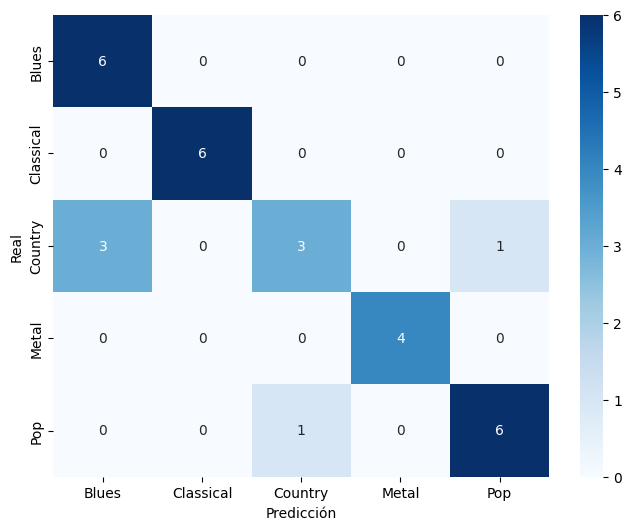

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [ ]:
# Calculate metrics
precision = precision_score(y_test, rf_predictions, average='weighted')
recall = recall_score(y_test, rf_predictions, average='weighted')
f1 = f1_score(y_test, rf_predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.8416666666666667
Recall: 0.8333333333333334
F1-score: 0.8206060606060606
